# 서울시 폭염, 열대야 현황 시각화

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [3]:
df_1911 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1911-1920 일별 기온.csv', encoding='cp949')
df_1921 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1921-1930 일별 기온.csv', encoding='cp949')
df_1931 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1931-1940 일별 기온.csv', encoding='cp949')
df_1941 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1941-1950 일별 기온.csv', encoding='cp949')
df_1951 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1951-1960 일별 기온.csv', encoding='cp949')
df_1961 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1961-1970 일별 기온.csv', encoding='cp949')
df_1971 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1971-1980 일별 기온.csv', encoding='cp949')
df_1981 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1981-1990 일별 기온.csv', encoding='cp949')
df_1991 = pd.read_csv('파이썬 데이터 시각화 데이터/data/1991-2000 일별 기온.csv', encoding='cp949')
df_2001 = pd.read_csv('파이썬 데이터 시각화 데이터/data/2001-2010 일별 기온.csv', encoding='cp949')
df_2011 = pd.read_csv('파이썬 데이터 시각화 데이터/data/2011-2020 일별 기온.csv', encoding='cp949')

In [4]:
# 데이터프레임 연결하기
df = pd.concat([df_1911,df_1921,df_1931,df_1941,df_1951,df_1961,df_1971,df_1981,df_1991,df_2001,df_2011]
              ,ignore_index=True)

In [5]:
df.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,105,강릉,1911-10-04,NaN,12.2,26.2
1,105,강릉,1911-10-09,NaN,6.0,16.6
2,105,강릉,1911-10-16,NaN,9.2,15.5
3,105,강릉,1911-11-01,NaN,6.0,14.8
4,105,강릉,1911-11-04,NaN,10.2,19.5


In [6]:
df.tail()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1596830,295,남해,2020-12-27,4.4,2.5,6.0
1596831,295,남해,2020-12-28,4.7,1.1,11.5
1596832,295,남해,2020-12-29,5.4,1.0,11.2
1596833,295,남해,2020-12-30,-3.0,-5.4,1.6
1596834,295,남해,2020-12-31,-1.3,-7.4,2.8


In [7]:
df['일시'] = pd.to_datetime(df['일시'])

In [8]:
df.dtypes

지점                   int64
지점명                 object
일시          datetime64[ns]
평균기온(°C)           float64
최저기온(°C)           float64
최고기온(°C)           float64
dtype: object

In [9]:
df.shape

(1596835, 6)

In [10]:
df['지점명'].nunique()

102

## 서울시 폭염/열대야 현황 시각화

In [11]:
df_seoul = df[df['지점명']=='서울']
df_seoul

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3299,108,서울,1911-01-01,-10.1,-14.2,-6.5
3300,108,서울,1911-01-02,-12.5,-19.7,-5.9
3301,108,서울,1911-01-03,-4.3,-10.2,-1.4
3302,108,서울,1911-01-04,0.8,-2.6,2.2
3303,108,서울,1911-01-05,-3.9,-8.7,1.7
...,...,...,...,...,...,...
1295576,108,서울,2020-12-27,5.8,1.4,10.0
1295577,108,서울,2020-12-28,6.7,4.2,11.4
1295578,108,서울,2020-12-29,0.1,-6.2,4.3
1295579,108,서울,2020-12-30,-10.9,-12.9,-6.2


### 서울시 폭염 데이터 추출

In [12]:
df_seoul_hotday = df_seoul[df_seoul['최고기온(°C)']>=33].copy()
df_seoul_hotday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3519,108,서울,1911-08-09,27.0,23.1,33.0
3520,108,서울,1911-08-10,28.2,24.2,33.8
3522,108,서울,1911-08-12,28.7,25.8,34.5
3523,108,서울,1911-08-13,27.5,23.0,33.8
3527,108,서울,1911-08-17,26.4,21.5,33.5
...,...,...,...,...,...,...
1295075,108,서울,2019-08-14,30.4,25.9,35.7
1295379,108,서울,2020-06-13,26.9,20.6,33.5
1295388,108,서울,2020-06-22,28.6,21.7,35.4
1295452,108,서울,2020-08-25,29.9,26.0,34.5


### 서울시 폭염 데이터 시각화

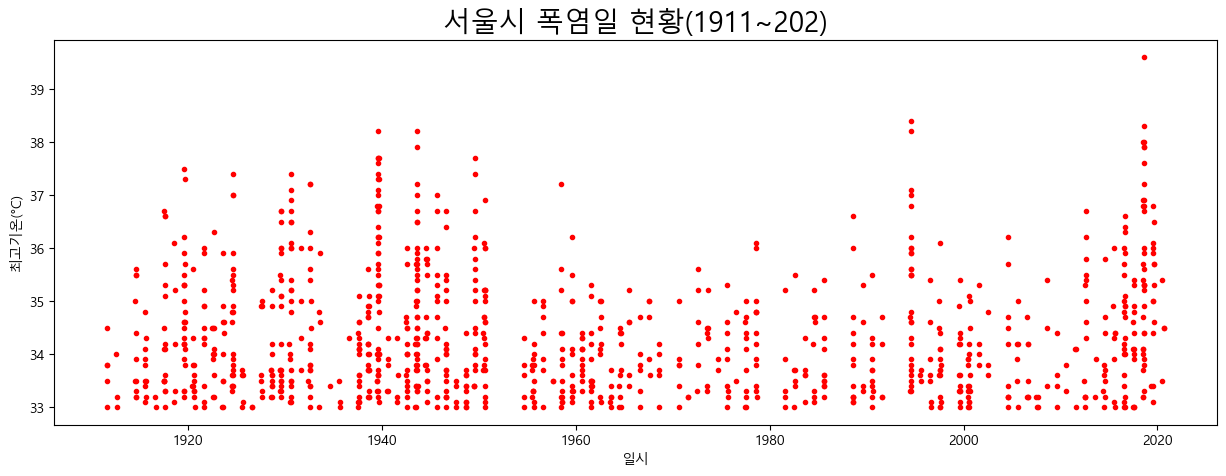

In [13]:
plt.rcParams['figure.figsize']=(15,5)

plt.plot(df_seoul_hotday['일시'],df_seoul_hotday['최고기온(°C)'], 'r.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)')
plt.title('서울시 폭염일 현황(1911~202)', size=20)

plt.show()

## 서울시 열대야 데이터 추출

In [14]:
df_seoul_hotnight = df_seoul[df_seoul['최저기온(°C)']>=25]
df_seoul_hotnight

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
3522,108,서울,1911-08-12,28.7,25.8,34.5
4601,108,서울,1914-07-26,29.7,25.8,35.6
4602,108,서울,1914-07-27,30.2,25.6,35.5
4605,108,서울,1914-07-30,25.7,25.1,27.4
4621,108,서울,1914-08-15,27.2,25.2,31.5
...,...,...,...,...,...,...
1295452,108,서울,2020-08-25,29.9,26.0,34.5
1295453,108,서울,2020-08-26,30.2,27.0,34.5
1295454,108,서울,2020-08-27,27.1,25.6,28.6
1295455,108,서울,2020-08-28,27.3,26.0,29.7


## 서울시 열대야 데이터 시각화

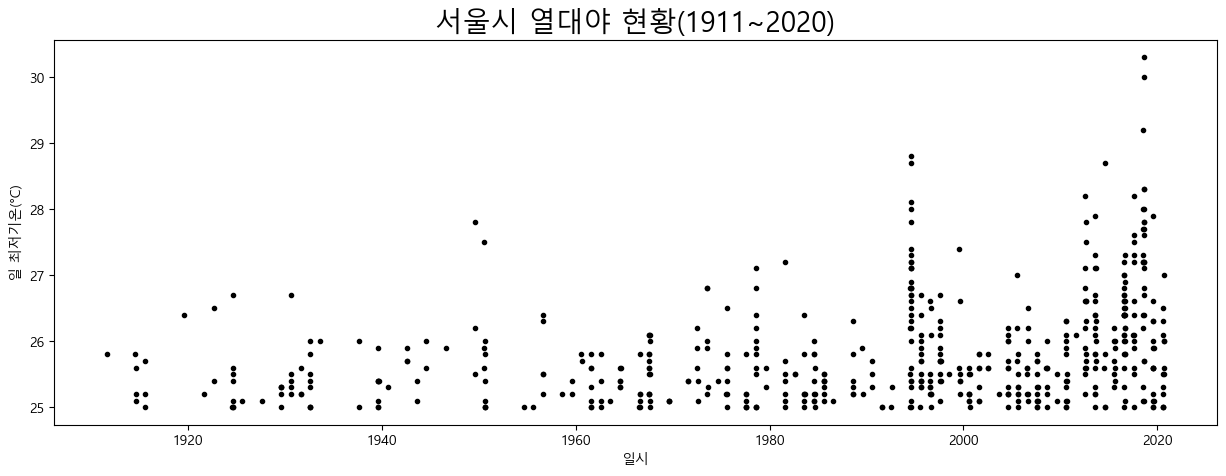

In [15]:
plt.plot(df_seoul_hotnight['일시'], df_seoul_hotnight['최저기온(°C)'], 'k.')
plt.title('서울시 열대야 현황(1911~2020)', size=20)
plt.xlabel('일시')
plt.ylabel('일 최저기온(°C)')
plt.show()

## 최고 폭염일, 최고 열대야 강조하기

In [16]:
df_seoul_hotestday = df_seoul_hotday.nlargest(10,'최고기온(°C)')
df_seoul_hotestday

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
1294697,108,서울,2018-08-01,33.6,27.8,39.6
719667,108,서울,1994-07-24,33.1,28.1,38.4
1294696,108,서울,2018-07-31,32.6,27.8,38.3
57401,108,서울,1939-08-10,30.1,24.5,38.2
85687,108,서울,1943-08-24,29.0,23.2,38.2
719666,108,서울,1994-07-23,32.6,28.0,38.2
1294687,108,서울,2018-07-22,31.8,25.3,38.0
1294711,108,서울,2018-08-15,31.7,28.3,38.0
85691,108,서울,1943-08-28,29.2,24.5,37.9
1294698,108,서울,2018-08-02,33.7,30.3,37.9


In [17]:
df_seoul_hotestday = df_seoul_hotestday.iloc[[0]]

print(df_seoul_hotestday.iloc[0,2].date())
print(df_seoul_hotestday.iloc[0,5])


2018-08-01
39.6


### 시각화

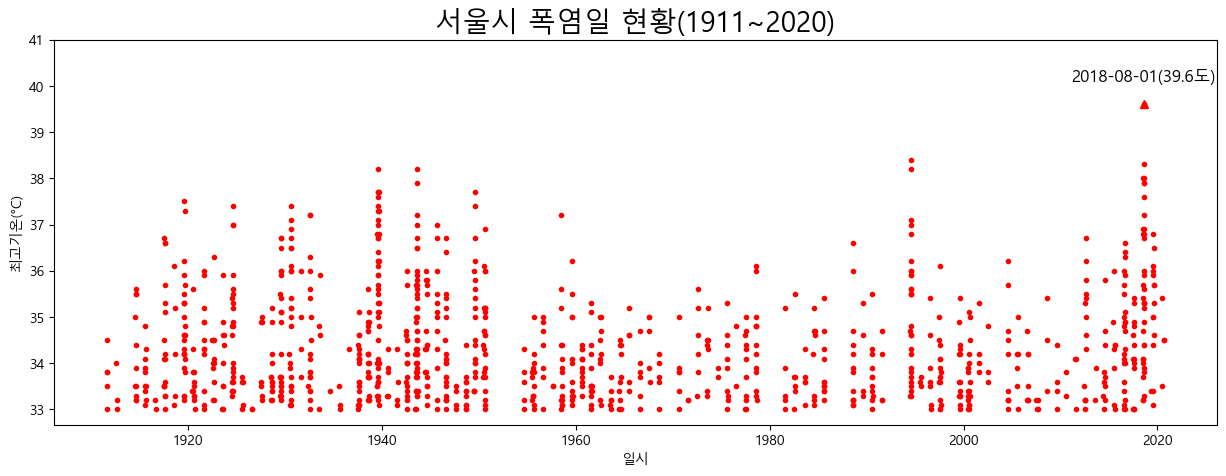

In [18]:
# plot
plt.plot(df_seoul_hotday['일시'], df_seoul_hotday['최고기온(°C)'], 'r.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)')
plt.title('서울시 폭염일 현황(1911~2020)', size=20)

# 가장 더웠던 날 표시
plt.plot(df_seoul_hotestday.iloc[0,2].date(), df_seoul_hotestday.iloc[0,5], 'r^')

# 가장 더웠던 날짜, 온도 표시
plt.text(df_seoul_hotestday.iloc[0,2].date(), df_seoul_hotestday.iloc[0,5]+0.5,
        str(df_seoul_hotestday.iloc[0,2].date())+'('+str(df_seoul_hotestday.iloc[0,5])+'도)',
        ha='center', size=12)

plt.yticks(range(33,42))

plt.show()

## 열대야가 가장 심했던 날 best10

In [19]:
df_seoul_hotestnight = df_seoul_hotnight.nlargest(10,'최저기온(°C)')

In [20]:
print(df_seoul_hotestnight.iloc[0,2].date())
print(df_seoul_hotestnight.iloc[0,4])

2018-08-02
30.3


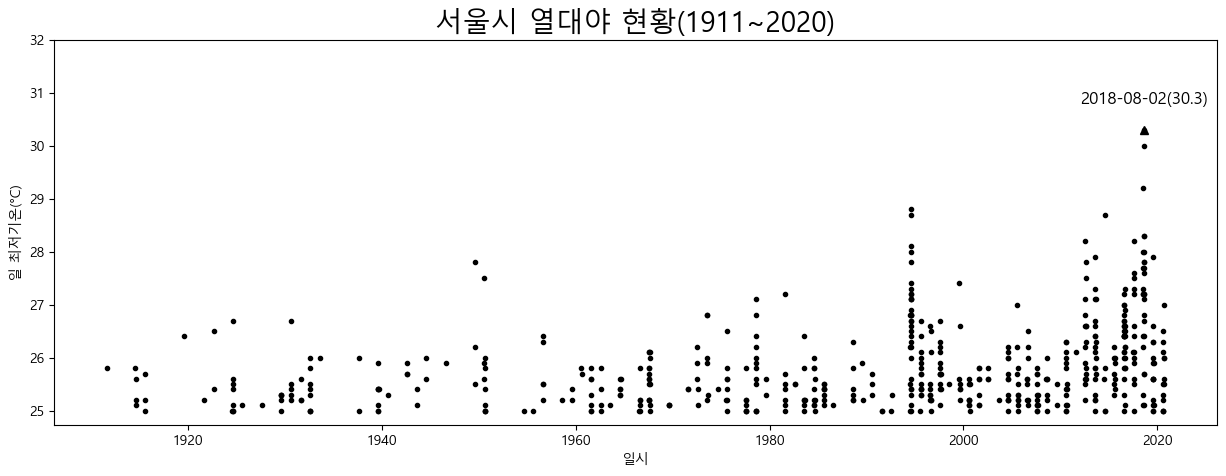

In [21]:
# plot
plt.plot(df_seoul_hotnight['일시'], df_seoul_hotnight['최저기온(°C)'], 'k.')
plt.title('서울시 열대야 현황(1911~2020)', size=20)
plt.xlabel('일시')
plt.ylabel('일 최저기온(°C)')

# 가장 더웠던 밤 표시
plt.plot(df_seoul_hotestnight.iloc[0,2].date(), df_seoul_hotestnight.iloc[0,4], 'k^')

# 가장 더웠던 날짜, 온도 표시
plt.text(df_seoul_hotestnight.iloc[0,2].date(), df_seoul_hotestnight.iloc[0,4]+0.5, 
        str(df_seoul_hotestnight.iloc[0,2].date())+'('+str(df_seoul_hotestnight.iloc[0,4])+')',
        ha='center', size=12)
plt.yticks(range(25,33))


plt.show()


## 연도별 폭염일수, 열대야일수

In [22]:
# 연도별 폭염일수
df_seoul_hotday_count = df_seoul_hotday.groupby(df_seoul_hotday['일시'].dt.year)['일시'].count().to_frame()
df_seoul_hotday_count

,일시
일시,
1911,5
1912,3
1914,11
1915,10
1916,2
...,...
2016,24
2017,13
2018,35


In [23]:
# 폭염이 없는날을 포함시키기 위헤 데이터프레임 생성
df_years = pd.DataFrame(range(1911,2021))
df_years.index = df_years[0]
df_years

,0
0,
1911,1911
1912,1912
1913,1913
1914,1914
1915,1915
...,...
2016,2016
2017,2017
2018,2018


In [24]:
# 연도별 폭염일수, 연도 데이터프레임 concat
df_seoul_hotday_count = pd.concat([df_seoul_hotday_count,df_years], axis=1)
df_seoul_hotday_count

,일시,0
1911,5.0,1911
1912,3.0,1912
1914,11.0,1914
1915,10.0,1915
1916,2.0,1916
...,...,...
1987,NaN,1987
1992,NaN,1992
1993,NaN,1993
1998,NaN,1998


In [25]:
# 불필요한 컬럼 삭제
df_seoul_hotday_count.drop(columns=[0], inplace=True)
df_seoul_hotday_count

,일시
1911,5.0
1912,3.0
1914,11.0
1915,10.0
1916,2.0
...,...
1987,NaN
1992,NaN
1993,NaN
1998,NaN


In [26]:
# 결측치 확인
df_seoul_hotday_count.isnull().sum()

일시    13
dtype: int64

In [27]:
# null -> 폭염일이 없음을 뜻함 --> null을 0으로채우기
df_seoul_hotday_count = df_seoul_hotday_count.fillna(0)
df_seoul_hotday_count

,일시
1911,5.0
1912,3.0
1914,11.0
1915,10.0
1916,2.0
...,...
1987,0.0
1992,0.0
1993,0.0
1998,0.0


In [28]:
# 컬럼명을 알맞게 바꾸기
df_seoul_hotday_count.columns=['폭염일수']

In [29]:
# 폭염일수 데이터를 정수형으로 바꾸기
df_seoul_hotday_count = df_seoul_hotday_count.astype('int64')

In [30]:
df_seoul_hotday_count.nlargest(10,'폭염일수')

,폭염일수
1939,47
1943,43
2018,35
1994,29
1919,25
1950,25
1930,24
2016,24
1924,23
1929,22


## 연도별 열대야일수 추출

In [31]:
# 연도별 열대야일수 : 여도로 그룹핑하여 데이터 추출
df_seoul_hotnight.groupby(df_seoul_hotnight['일시'].dt.year)['일시'].count().to_frame()

,일시
일시,
1911,1
1914,4
1915,3
1919,1
1921,1
...,...
2016,32
2017,14
2018,28


In [32]:
# 연도별 열대야 일수 : 연도로 그룹핑하여 데이터개수 카운트
df_seoul_hotnight_count = df_seoul_hotnight.groupby(df_seoul_hotnight['일시'].dt.year)['일시'].count().to_frame()
df_seoul_hotnight_count

,일시
일시,
1911,1
1914,4
1915,3
1919,1
1921,1
...,...
2016,32
2017,14
2018,28


In [33]:
# 연도 데이터프레임과 연도별 열대야일수 데이터 프레임 concat
df_seoul_hotnight_count = pd.concat([df_seoul_hotnight_count, df_years], axis=1)
df_seoul_hotnight_count

,일시,0
1911,1.0,1911
1914,4.0,1914
1915,3.0,1915
1919,1.0,1919
1921,1.0,1921
...,...,...
1970,NaN,1970
1976,NaN,1976
1980,NaN,1980
1987,NaN,1987


In [34]:
# 불필요한 컬럼 삭제
df_seoul_hotnight_count.drop(columns=[0], inplace=True)

In [35]:
# 컬럼명 변경
df_seoul_hotnight_count.columns=['열대야일수']

In [36]:
# 결측치 확인
df_seoul_hotnight_count.isnull().sum()

열대야일수    28
dtype: int64

In [37]:
# null->0으로 채우기
df_seoul_hotnight_count = df_seoul_hotnight_count.fillna(0)

In [38]:
# 열대야일수 자료형을 정수형으로 변경
df_seoul_hotnight_count = df_seoul_hotnight_count.astype('int64')

In [39]:
# 열대야 일수가 가장 많았던 해외 ㄷ이터 best 10
df_seoul_hotnight_count.nlargest(10,'열대야일수')

,열대야일수
1994,34
2016,32
2018,28
2013,20
2012,17
1967,16
2019,16
1995,15
1997,14
2010,14


## 연도별 폭염일수 , 열대야일수 시각화

In [40]:
df_seoul_hotday_count.head()

,폭염일수
1911,5
1912,3
1914,11
1915,10
1916,2


In [41]:
df_seoul_hotnight_count.head()

,열대야일수
1911,1
1914,4
1915,3
1919,1
1921,1


### 서브플롯으로 비교하기

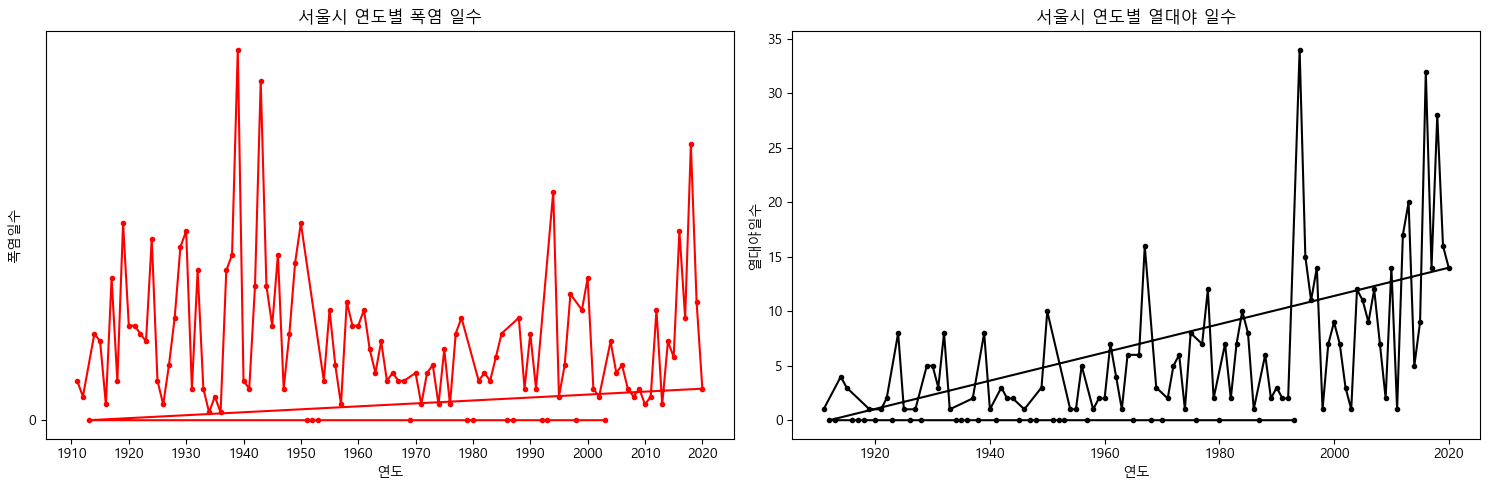

In [53]:
# 서브플롯 만들기
fig, ax = plt.subplots(1,2)

# 연도별 폭염일수, 열대야일수 시각화
ax[0].plot(df_seoul_hotday_count.index, df_seoul_hotday_count['폭염일수'], 'r.-')
ax[1].plot(df_seoul_hotnight_count.index, df_seoul_hotnight_count['열대야일수'], 'k.-')

# xlabel
ax[0].set_xlabel('연도')
ax[1].set_xlabel('연도')

# ylabel
ax[0].set_ylabel('폭염일수')
ax[1].set_ylabel('열대야일수')

# xticks, yticks 범위 지정하고 틱 공유
ax[0].set_xticks(range(1910,2021,10))
ax[0].set_yticks(range(0,50,51))

# title
ax[0].set_title('서울시 연도별 폭염 일수')
ax[1].set_title('서울시 연도별 열대야 일수')

fig.tight_layout()
plt.show()

## 다중막대그래프로 비교하기

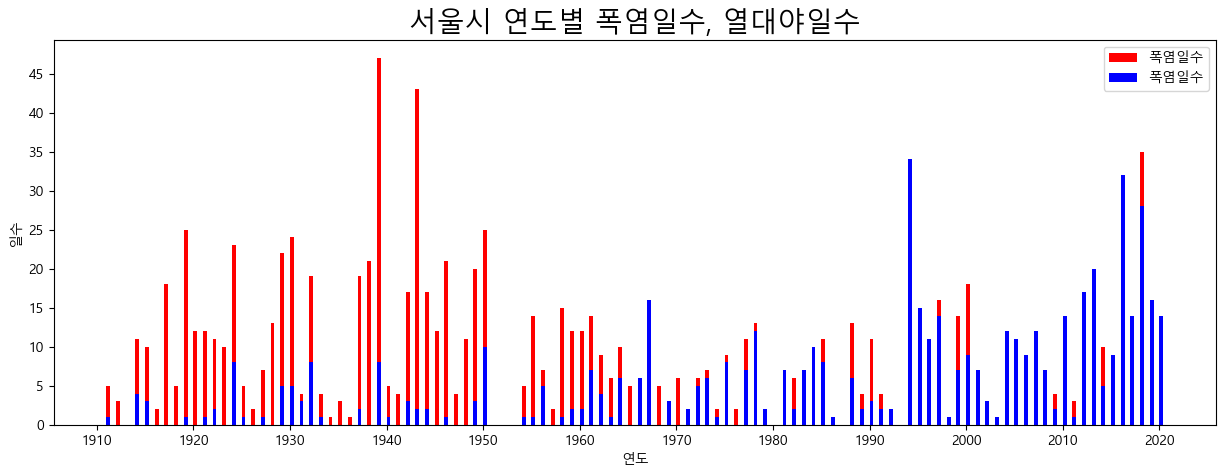

In [59]:
fig, ax = plt.subplots()

ax.bar(df_seoul_hotday_count.index, df_seoul_hotday_count['폭염일수'],width = 0.4, align = 'edge'
      , color = 'r', label='폭염일수')

ax.bar(df_seoul_hotnight_count.index, df_seoul_hotnight_count['열대야일수'],width = 0.4, align = 'edge'
      , color = 'b', label='폭염일수')

ax.legend()

ax.set_title('서울시 연도별 폭염일수, 열대야일수', size=20)
ax.set_xlabel('연도')
ax.set_ylabel('일수')
ax.set_xticks(range(1910,2021,10))
ax.set_yticks(range(0,50,5))

plt.show()

# 지역별 인구구조 시각화

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [61]:
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

In [62]:
df = pd.read_csv('파이썬 데이터 시각화 데이터/data/202110_202110_주민등록인구및세대현황_월간.csv', encoding='cp949')
df

,행정구역,2021년10월_총인구수,2021년10월_세대수,2021년10월_세대당 인구,2021년10월_남자 인구수,2021년10월_여자 인구수,2021년10월_남여 비율
0,서울특별시 (1100000000),"9,532,428","4,422,587",2.16,"4,630,630","4,901,798",0.94
1,서울특별시 종로구 (1111000000),"145,346","73,613",1.97,"70,552","74,794",0.94
2,서울특별시 종로구 청운효자동(1111051500),"12,011","5,252",2.29,"5,553","6,458",0.86
3,서울특별시 종로구 사직동(1111053000),"9,367","4,686",2.00,"4,206","5,161",0.81
4,서울특별시 종로구 삼청동(1111054000),"2,478","1,251",1.98,"1,178","1,300",0.91
...,...,...,...,...,...,...,...
3847,제주특별자치도 서귀포시 서홍동(5013058000),"10,999","4,517",2.44,"5,435","5,564",0.98
3848,제주특별자치도 서귀포시 대륜동(5013059000),"15,216","6,760",2.25,"7,691","7,525",1.02
3849,제주특별자치도 서귀포시 대천동(5013060000),"13,900","6,474",2.15,"7,048","6,852",1.03
3850,제주특별자치도 서귀포시 중문동(5013061000),"11,886","5,731",2.07,"6,057","5,829",1.04


In [63]:
# 컬럼명 변경
df.columns=['행정구역','총인구수','세대수','세대당 인구','남자 인구수','여자 인구수','남여 비율']

In [64]:
df.head(1)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,532,428","4,422,587",2.16,"4,630,630","4,901,798",0.94


In [65]:
# 자료형 확인, 변환
df.dtypes

행정구역       object
총인구수       object
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [71]:
# 숫자형으로 변환
df['총인구수'] = df['총인구수'].str.replace(',','').astype('int64')

In [72]:
df.dtypes

행정구역       object
총인구수        int64
세대수        object
세대당 인구    float64
남자 인구수     object
여자 인구수     object
남여 비율     float64
dtype: object

In [74]:
df['세대수'] = df['세대수'].str.replace(',','').astype('int64')

AttributeError: Can only use .str accessor with string values!

In [76]:
df['남자 인구수'] = df['남자 인구수'].str.replace(',','').astype('int64')

In [77]:
df['여자 인구수'] = df['여자 인구수'].str.replace(',','').astype('int64')

In [78]:
df.dtypes

행정구역       object
총인구수        int64
세대수         int64
세대당 인구    float64
남자 인구수      int64
여자 인구수      int64
남여 비율     float64
dtype: object

In [81]:
# 시도별 서브셋 생성
df_sido = df[df['행정구역'].str.contains('00000000')].copy()
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00
999,광주광역시 (2900000000),1442454,643841,2.24,713483,728971,0.98
1102,대전광역시 (3000000000),1454228,662615,2.19,725742,728486,1.00
1187,울산광역시 (3100000000),1122566,481811,2.33,576723,545843,1.06
1249,세종특별자치시 (3600000000),368276,151639,2.43,183879,184397,1.00
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01
1882,강원도 (4200000000),1537717,743798,2.07,774008,763709,1.01


In [86]:
df_sido['시도명'] = df_sido['행정구역'].str.split(' ').str[0]

## 시도별 인구수 시각화

### 총 인구수로 데이터 정렬하기

In [95]:
df_sido = df_sido.sort_values('총인구수',ascending = False)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97,대구광역시
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도
2492,전라북도 (4500000000),1789770,847406,2.11,890378,899392,0.99,전라북도


### 막대그래프로 시각화하기

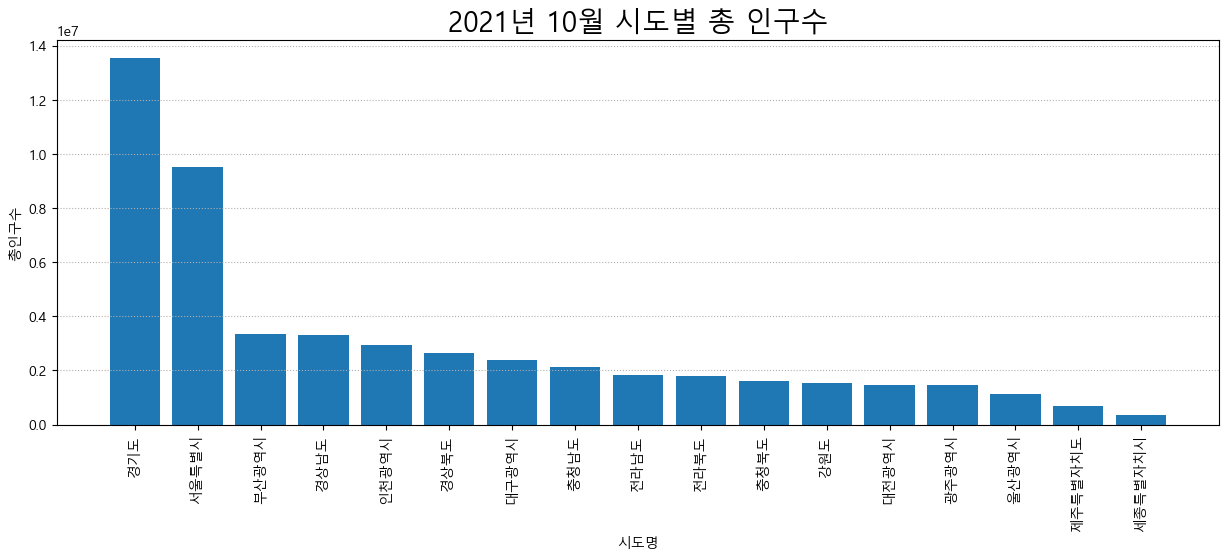

In [96]:
# matplotlib
plt.rcParams['figure.figsize']=(15,5)

plt.bar(df_sido['시도명'], df_sido['총인구수'])
plt.xticks(rotation=90)
plt.title('2021년 10월 시도별 총 인구수', size=20)
plt.xlabel('시도명')
plt.ylabel('총인구수')
plt.grid(axis='y', ls=':')
plt.show()

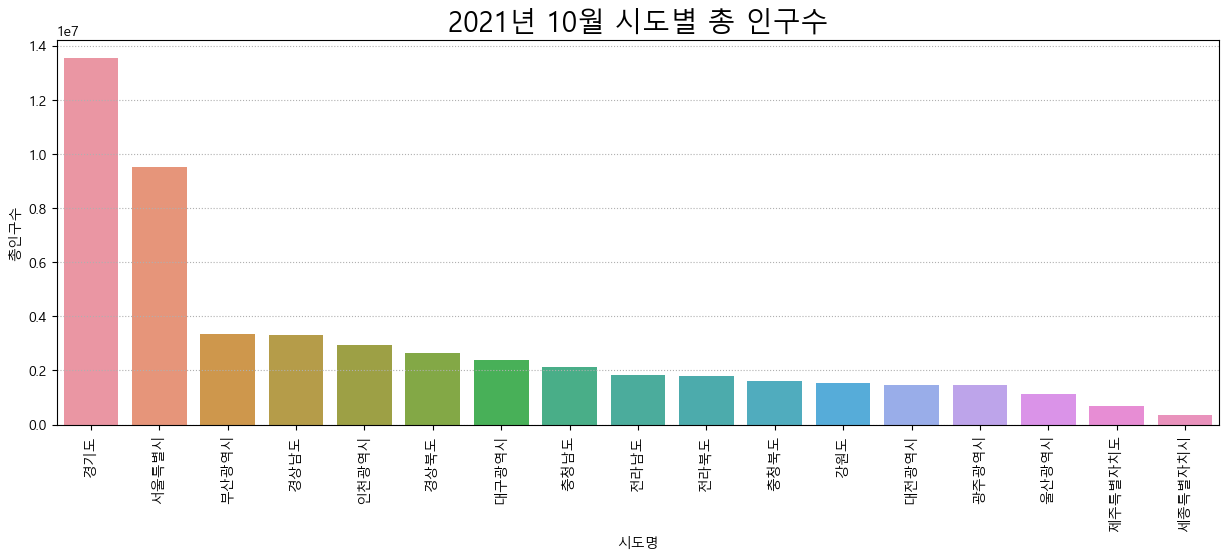

In [100]:
# seaborn
sns.barplot(data=df_sido, x='시도명', y='총인구수')
plt.title('2021년 10월 시도별 총 인구수',size = 20)
plt.grid(axis='y',ls=':')
plt.xticks(rotation=90)
plt.show()

### 파이그래프로 시각화

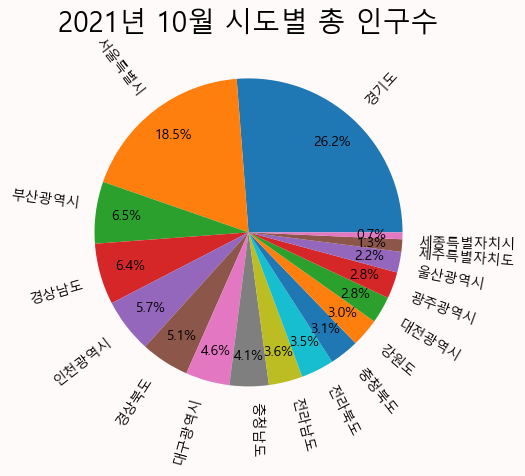

In [107]:
plt.figure(facecolor='snow')
plt.pie(df_sido['총인구수'], labels =df_sido['시도명']
       , autopct='%.1f%%', pctdistance=0.8, rotatelabels=True)
plt.title('2021년 10월 시도별 총 인구수',size = 20)
plt.show()

## 시도별 세대당 인구수 시각화

In [108]:
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도
674,대구광역시 (2700000000),2390721,1062993,2.25,1178486,1212235,0.97,대구광역시
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도
2492,전라북도 (4500000000),1789770,847406,2.11,890378,899392,0.99,전라북도


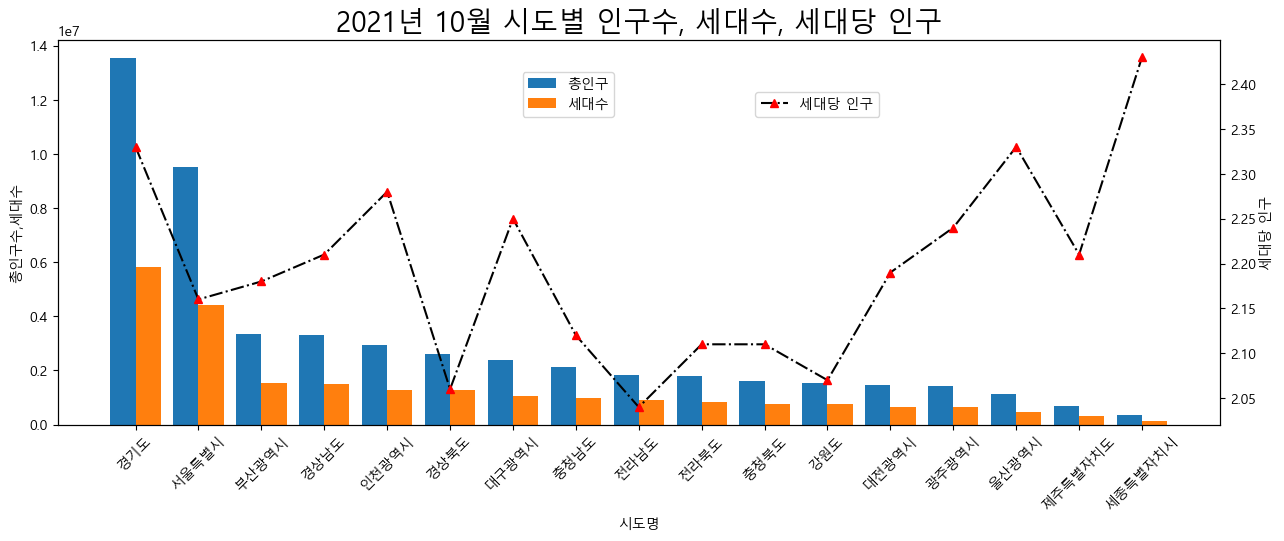

In [123]:
fig, ax1 = plt.subplots()
ax1.bar(df_sido['시도명'], df_sido['총인구수'], width=-0.4, align='edge', label='총인구')
ax1.bar(df_sido['시도명'], df_sido['세대수'], width=0.4, align='edge', label='세대수')
ax1.legend(loc=(0.4,0.8))
ax1.set_xlabel('시도명')
ax1.set_ylabel('총인구수,세대수')
plt.xticks(rotation=45)


ax2 = ax1.twinx()
ax2.plot(df_sido['시도명'], df_sido['세대당 인구'], 'k^-.', mfc='r', mec='r', label='세대당 인구')
ax2.legend(loc=(0.6,0.8))
ax2.set_ylabel('세대당 인구')

ax2.set_title('2021년 10월 시도별 인구수, 세대수, 세대당 인구', size= 20)

plt.show()

## 시도별 성별 인구수 시각화

In [124]:
df_sido.head(3)

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도
0,서울특별시 (1100000000),9532428,4422587,2.16,4630630,4901798,0.94,서울특별시
452,부산광역시 (2600000000),3356311,1541975,2.18,1642368,1713943,0.96,부산광역시


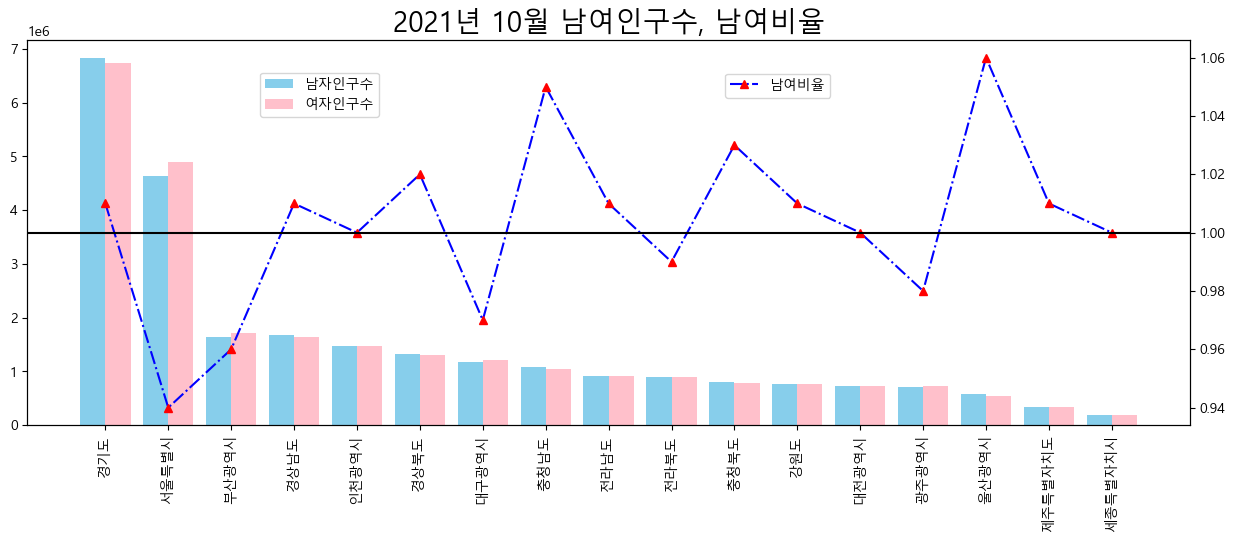

In [139]:
fig, ax1 = plt.subplots()
ax1.bar(df_sido['시도명'],df_sido['남자 인구수'], width=-0.4, align='edge', color='skyblue', label='남자인구수')
ax1.bar(df_sido['시도명'],df_sido['여자 인구수'], width=0.4, align='edge', color='pink', label='여자인구수')
ax1.legend(loc=(0.2,0.8))
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(df_sido['시도명'], df_sido['남여 비율'], 'b^-.', mfc='r', mec='r', label = '남여비율')
ax2.legend(loc=(0.6,0.85))
ax2.axhline(1, color='k')
ax2.set_title('2021년 10월 남여인구수, 남여비율', size=20)

plt.show()

## 성별 인구수 시각화

In [140]:
df_sido['남여인구수차이'] = df_sido['남자 인구수']-df_sido['여자 인구수']
df_sido = df_sido.sort_values('남여인구수차이', ascending=False)
df_sido

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,시도명,남여인구수차이
1273,경기도 (4100000000),13549577,5820524,2.33,6820025,6729552,1.01,경기도,90473
2265,충청남도 (4400000000),2118977,999286,2.12,1083133,1035844,1.05,충청남도,47289
1187,울산광역시 (3100000000),1122566,481811,2.33,576723,545843,1.06,울산광역시,30880
2095,충청북도 (4300000000),1596948,757980,2.11,810093,786855,1.03,충청북도,23238
3469,경상남도 (4800000000),3318161,1503397,2.21,1670394,1647767,1.01,경상남도,22627
3100,경상북도 (4700000000),2627925,1273579,2.06,1324128,1303797,1.02,경상북도,20331
2754,전라남도 (4600000000),1834653,901203,2.04,923037,911616,1.01,전라남도,11421
1882,강원도 (4200000000),1537717,743798,2.07,774008,763709,1.01,강원도,10299
826,인천광역시 (2800000000),2945009,1294158,2.28,1474536,1470473,1.00,인천광역시,4063
3806,제주특별자치도 (5000000000),676569,306741,2.21,339195,337374,1.01,제주특별자치도,1821


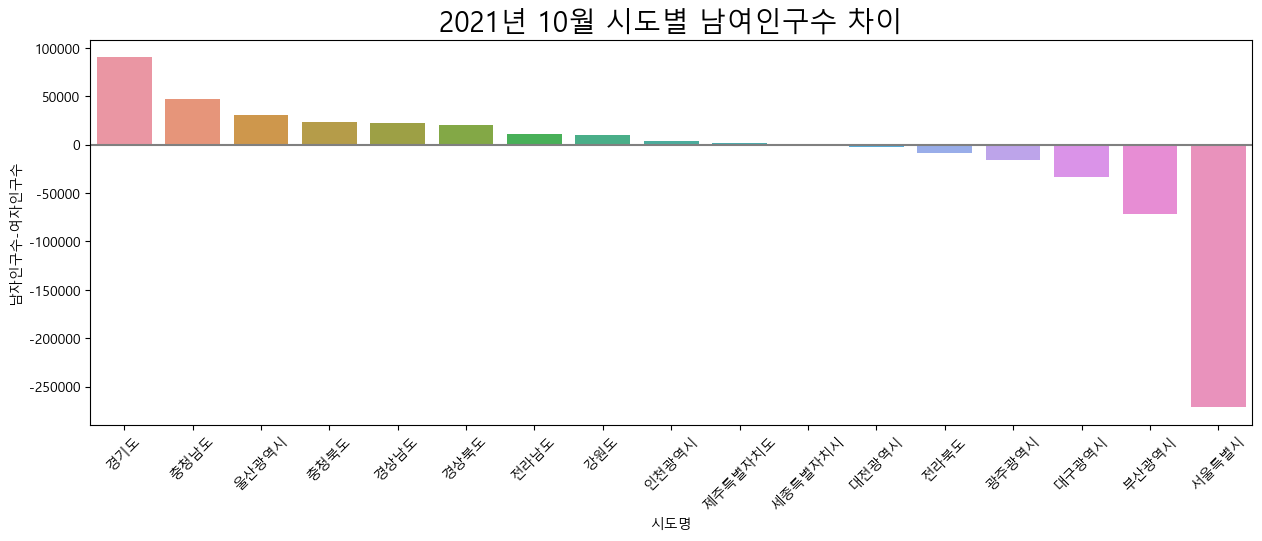

In [144]:
# seaborn
sns.barplot(data=df_sido, x='시도명', y='남여인구수차이')
plt.xticks(rotation=45)
plt.axhline(0, color='gray')
plt.title('2021년 10월 시도별 남여인구수 차이',size =20)
plt.ylabel('남자인구수-여자인구수')
plt.show()

## 서울시 구별/동별 인구수 시각화

In [155]:
df_seoul = df[df['행정구역'].str.find('구 (11')>0]
df_seoul

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,서울특별시 종로구 (1111000000),145346,73613,1.97,70552,74794,0.94
19,서울특별시 중구 (1114000000),122781,63409,1.94,59802,62979,0.95
35,서울특별시 용산구 (1117000000),223713,111067,2.01,107607,116106,0.93
52,서울특별시 성동구 (1120000000),287174,134517,2.13,139958,147216,0.95
70,서울특별시 광진구 (1121500000),340814,167559,2.03,164425,176389,0.93
86,서울특별시 동대문구 (1123000000),337538,167754,2.01,166842,170696,0.98
101,서울특별시 중랑구 (1126000000),388218,185505,2.09,191601,196617,0.97
118,서울특별시 성북구 (1129000000),432081,195126,2.21,208308,223773,0.93
139,서울특별시 강북구 (1130500000),300278,144501,2.08,146240,154038,0.95
153,서울특별시 도봉구 (1132000000),318299,138655,2.30,154970,163329,0.95


In [156]:
df_seoul.shape

(25, 7)

In [157]:
df_seoul['구'] = df_seoul['행정구역'].str.split(' ').str[1]

C:\Users\twas0\AppData\Local\Temp\ipykernel_5320\1665277061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul['구'] = df_seoul['행정구역'].str.split(' ').str[1]


In [158]:
df_seoul = df_seoul.sort_values('총인구수', ascending=False)
df_seoul

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,구
404,서울특별시 송파구 (1171000000),659239,282185,2.34,317773,341466,0.93,송파구
256,서울특별시 강서구 (1150000000),575370,270623,2.13,277041,298329,0.93,강서구
381,서울특별시 강남구 (1168000000),533878,234533,2.28,255473,278405,0.92,강남구
168,서울특별시 노원구 (1135000000),512129,217201,2.36,246650,265479,0.93,노원구
340,서울특별시 관악구 (1162000000),487357,276315,1.76,244844,242513,1.01,관악구
188,서울특별시 은평구 (1138000000),473369,214126,2.21,226514,246855,0.92,은평구
432,서울특별시 강동구 (1174000000),463752,201428,2.30,227755,235997,0.97,강동구
237,서울특별시 양천구 (1147000000),448634,181434,2.47,219862,228772,0.96,양천구
118,서울특별시 성북구 (1129000000),432081,195126,2.21,208308,223773,0.93,성북구
362,서울특별시 서초구 (1165000000),415083,171083,2.43,198470,216613,0.92,서초구


### 시각화

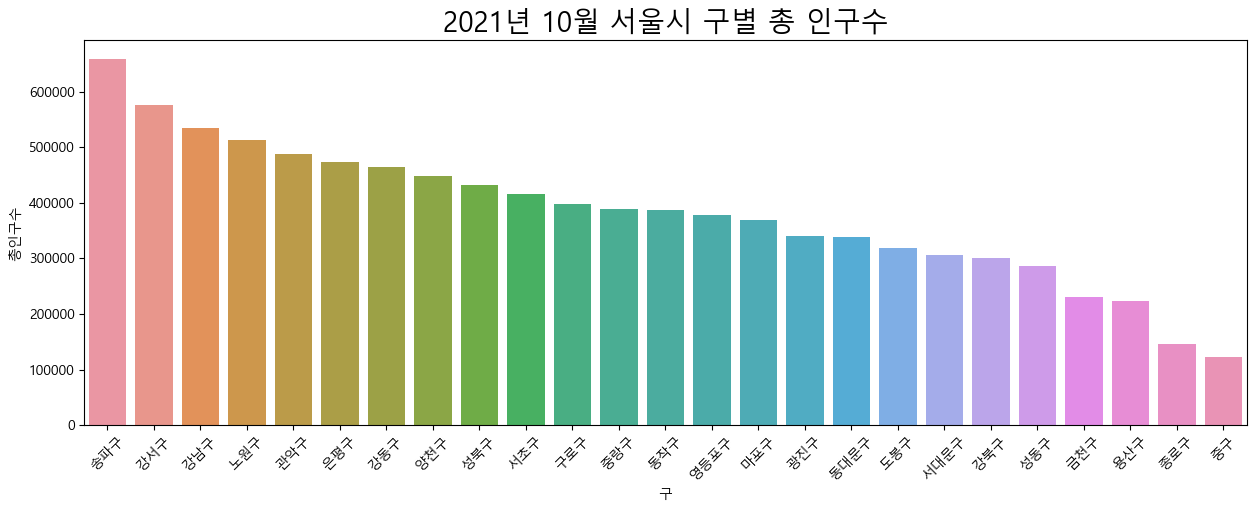

In [160]:
sns.barplot(data = df_seoul, x='구', y='총인구수')
plt.title('2021년 10월 서울시 구별 총 인구수', size=20)
plt.xticks(rotation = 45)
plt.show()

### 동별 인구수 시각화

In [167]:
df_song = df[df['행정구역'].str.find('동(1171')>0].copy()
df_song

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
405,서울특별시 송파구 풍납1동(1171051000),12989,6027,2.16,6355,6634,0.96
406,서울특별시 송파구 풍납2동(1171052000),24977,11019,2.27,11873,13104,0.91
407,서울특별시 송파구 거여1동(1171053100),12615,5648,2.23,6367,6248,1.02
408,서울특별시 송파구 거여2동(1171053200),18811,8153,2.31,9252,9559,0.97
409,서울특별시 송파구 마천1동(1171054000),19005,8785,2.16,9718,9287,1.05
410,서울특별시 송파구 마천2동(1171055000),18845,8726,2.16,9587,9258,1.04
411,서울특별시 송파구 방이1동(1171056100),15771,6263,2.52,7603,8168,0.93
412,서울특별시 송파구 방이2동(1171056200),26657,15316,1.74,12388,14269,0.87
413,서울특별시 송파구 오륜동(1171056600),18063,5929,3.05,8857,9206,0.96
414,서울특별시 송파구 오금동(1171057000),38637,15663,2.47,18739,19898,0.94


In [169]:
df_song['동'] = df_song['행정구역'].str.split(' ').str[2].str.split('(').str[0]
df_song

,행정구역,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,동
405,서울특별시 송파구 풍납1동(1171051000),12989,6027,2.16,6355,6634,0.96,풍납1동
406,서울특별시 송파구 풍납2동(1171052000),24977,11019,2.27,11873,13104,0.91,풍납2동
407,서울특별시 송파구 거여1동(1171053100),12615,5648,2.23,6367,6248,1.02,거여1동
408,서울특별시 송파구 거여2동(1171053200),18811,8153,2.31,9252,9559,0.97,거여2동
409,서울특별시 송파구 마천1동(1171054000),19005,8785,2.16,9718,9287,1.05,마천1동
410,서울특별시 송파구 마천2동(1171055000),18845,8726,2.16,9587,9258,1.04,마천2동
411,서울특별시 송파구 방이1동(1171056100),15771,6263,2.52,7603,8168,0.93,방이1동
412,서울특별시 송파구 방이2동(1171056200),26657,15316,1.74,12388,14269,0.87,방이2동
413,서울특별시 송파구 오륜동(1171056600),18063,5929,3.05,8857,9206,0.96,오륜동
414,서울특별시 송파구 오금동(1171057000),38637,15663,2.47,18739,19898,0.94,오금동


In [170]:
df_song = df_song.sort_values('총인구수', ascending=False)

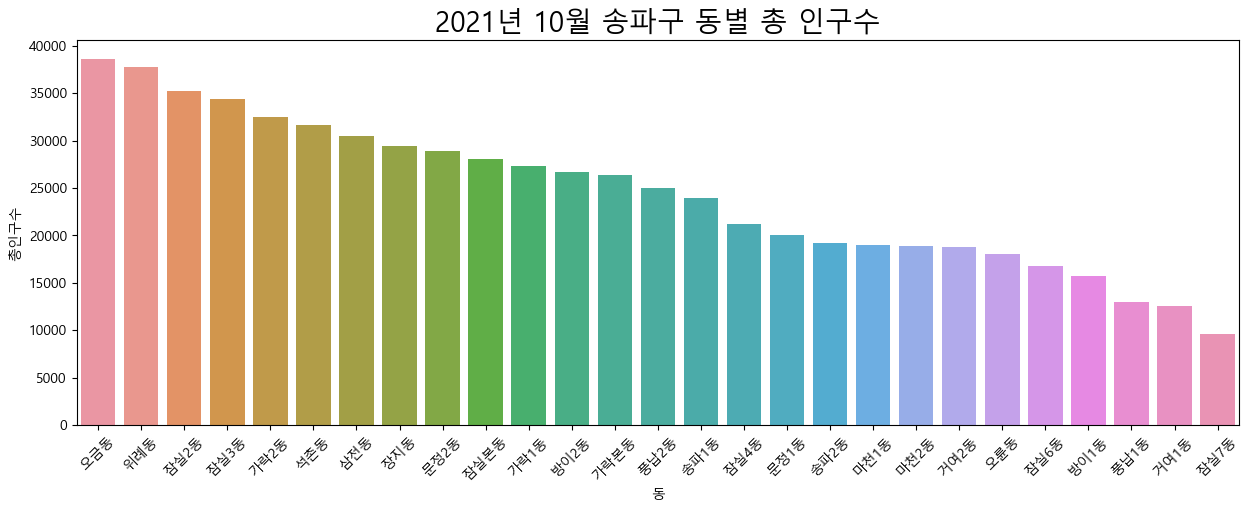

In [172]:
# 시각화
sns.barplot(data=df_song , x='동', y='총인구수')
plt.title('2021년 10월 송파구 동별 총 인구수', size=20)
plt.xticks(rotation = 45)
plt.show()